# This Data Analytics is for the poverty share of each country through 1981 - 2019

### Dataset: https://www.kaggle.com/datasets/mathurinache/extreme-poverty

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
poverty_share = pd.read_csv('poverty-share-on-less-than-30-per-day.csv')
poverty_share

,Entity,Code,Year,$30.00 per day - share of population below poverty line
0,Albania,ALB,1981,99.91247
1,Albania,ALB,1982,99.91247
2,Albania,ALB,1983,99.91247
3,Albania,ALB,1984,99.91247
4,Albania,ALB,1985,99.91247
...,...,...,...,...
6937,Zimbabwe,ZWE,2015,99.34802
6938,Zimbabwe,ZWE,2016,99.47000
6939,Zimbabwe,ZWE,2017,99.51887
6940,Zimbabwe,ZWE,2018,99.17403


In [8]:
poverty_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Entity                                                   6942 non-null   object 
 1   Code                                                     6395 non-null   object 
 2   Year                                                     6942 non-null   int64  
 3   $30.00 per day - share of population below poverty line  6942 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 217.1+ KB


---

#### I intentionally tried to find the mode of the data since we cant really see it when we use .describe() 

In [10]:
poverty_share['$30.00 per day - share of population below poverty line'].mode()

0    99.99
Name: $30.00 per day - share of population below poverty line, dtype: float64

In [11]:
poverty_share.describe()

,Year,$30.00 per day - share of population below poverty line
count,6942.000000,6942.000000
mean,2000.183665,87.483862
std,11.206647,23.085241
min,1981.000000,0.000000
25%,1991.000000,90.333517
50%,2000.000000,98.315405
75%,2010.000000,99.784852
max,2019.000000,99.990000


## Separate the data into half from 1981 - 1999 and 2000 - 2019

In [12]:
mask_1981_to_1999 = (poverty_share['Year'] >= 1981) & (poverty_share['Year'] <= 1999)
mask_2000_to_2001 = (poverty_share['Year'] >= 2000) & (poverty_share['Year'] <= 2019)

In [13]:
years_1981_to_1999 = poverty_share[mask_1981_to_1999]
years_2000_to_2019 = poverty_share[mask_2000_to_2001]

----
#### Analysis 1981 to 1999

In [14]:
years_1981_to_1999.describe()

,Year,$30.00 per day - share of population below poverty line
count,3328.000000,3328.000000
mean,1990.075120,90.015392
std,5.465723,19.797825
min,1981.000000,0.000000
25%,1985.000000,93.099502
50%,1990.000000,98.790545
75%,1995.000000,99.896902
max,1999.000000,99.990000


In [16]:
Aggregated_values1 = years_1981_to_1999.groupby('Year')['$30.00 per day - share of population below poverty line'].agg(['min', 'mean', 'max'])
Aggregated_values1.round(2)

,min,mean,max
Year,,,
1981,0.00,91.32,99.99
1982,0.00,91.29,99.99
1983,0.60,91.25,99.99
1984,0.72,91.02,99.99
1985,1.70,90.82,99.99
1986,4.50,90.47,99.99
1987,4.86,90.11,99.99
1988,6.20,89.89,99.99
1989,5.29,89.67,99.99


### After separating the data into two, plotting it using a line graph is beneficial to understand the progress of the world through the years.

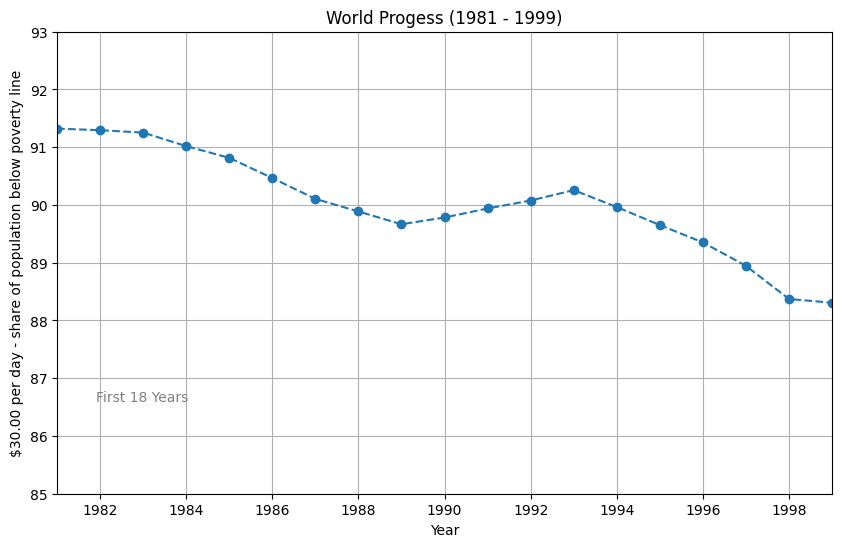

In [17]:
plt.figure(figsize=(10, 6))

mean_values = years_1981_to_1999.groupby('Year')['$30.00 per day - share of population below poverty line'].mean()


plt.plot(mean_values.index, mean_values.values, label='1981 - 1999', marker='o', linestyle='--')

plt.grid(True)
plt.xlabel('Year')
# Set custom x-axis limits without rounding
plt.xlim(mean_values.index.min(), mean_values.index.max())
plt.ylim(85, 93)
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.title('World Progess (1981 - 1999)')
plt.annotate(text=('First 18 Years'), xy=(0.05, 0.2) , xycoords='axes fraction', fontsize=10, color='gray')



plt.show()

### Analysis 2000 to 2019

In [18]:
years_2000_to_2019.describe()

,Year,$30.00 per day - share of population below poverty line
count,3614.000000,3614.000000
mean,2009.492252,85.152668
std,5.741581,25.525514
min,2000.000000,0.000000
25%,2005.000000,87.512698
50%,2010.000000,97.557580
75%,2014.000000,99.709187
max,2019.000000,99.990000


In [19]:
Aggregated_values2 = years_2000_to_2019.groupby('Year')['$30.00 per day - share of population below poverty line'].agg(['min', 'mean', 'max'])
Aggregated_values2.round(2)

,min,mean,max
Year,,,
2000,4.89,87.99,99.99
2001,0.00,87.74,99.99
2002,0.00,87.55,99.99
2003,0.00,87.25,99.99
2004,0.00,86.84,99.99
2005,0.47,86.43,99.99
2006,0.49,85.85,99.99
2007,0.85,85.06,99.99
2008,1.13,85.01,99.99


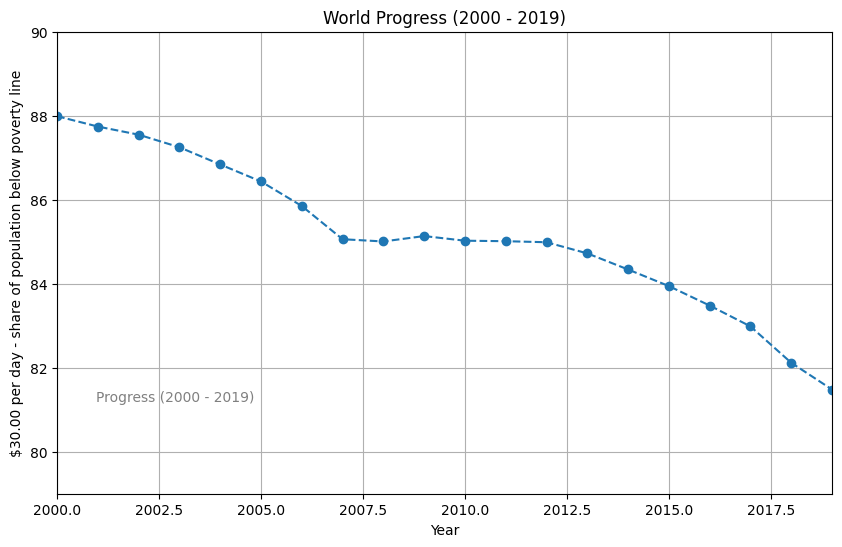

In [20]:
plt.figure(figsize=(10, 6))

mean_values2 = years_2000_to_2019.groupby('Year')['$30.00 per day - share of population below poverty line'].mean()

plt.plot(mean_values2.index, mean_values2.values, label='2000 - 2019', marker='o', linestyle='--')

plt.grid(True)
plt.xlabel('Year')
plt.xlim(mean_values2.index.min(), mean_values2.index.max())
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.ylim(79, 90)
plt.title('World Progress (2000 - 2019)')
plt.annotate(text=('Progress (2000 - 2019)'), xy=(0.05, 0.2), xycoords='axes fraction', fontsize=10, color='gray')

plt.show()

## Through this simple analysis we can see that the mean of the world $30 per day - share of population below poverty line has gone down through the years starting from 1981 to 2019. See full graph below

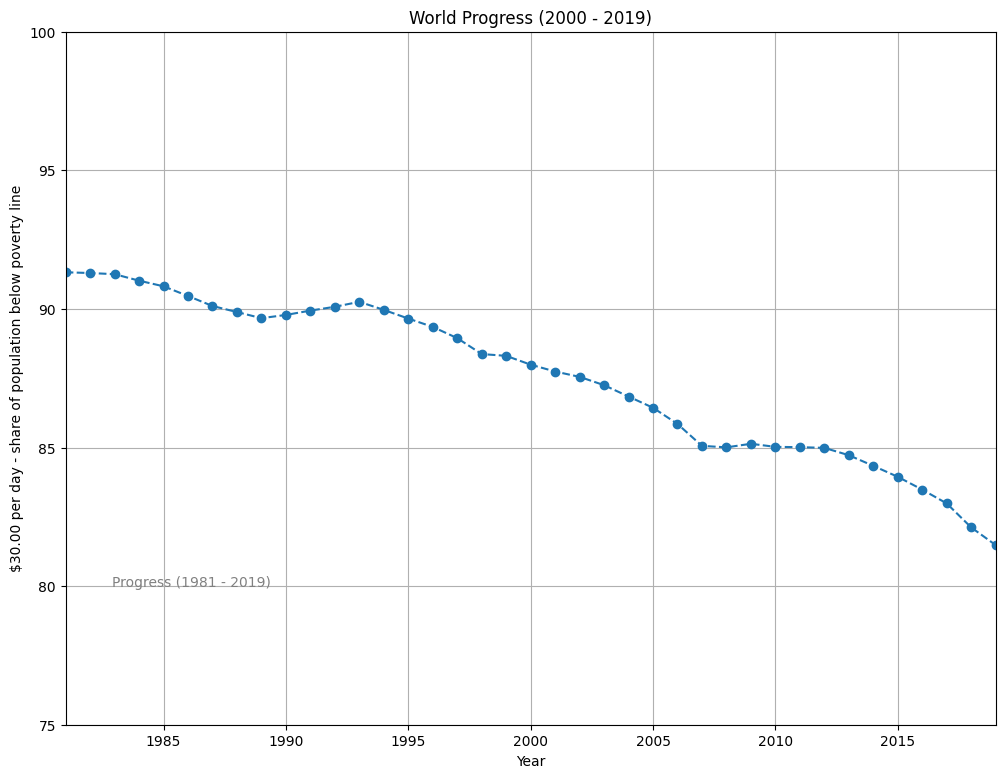

In [21]:
plt.figure(figsize=(12,9))

mean_values3 = poverty_share.groupby('Year')['$30.00 per day - share of population below poverty line'].mean()

plt.plot(mean_values3.index, mean_values3.values, label='World Progress', marker='o', linestyle='--')

plt.grid(True)
plt.xlabel('Year')
plt.xlim(mean_values3.index.min(), mean_values3.index.max())
plt.ylabel('$30.00 per day - share of population below poverty line')
plt.ylim(75, 100)
plt.title('World Progress (2000 - 2019)')
plt.annotate(text=('Progress (1981 - 2019)'), xy=(0.05, 0.2), xycoords='axes fraction', fontsize=10, color='gray')

plt.show()